In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import Tools

In [2]:
path = r'PTA_data_day'
dataList = []
IC = []
for filename in os.listdir (path):
    if filename == "ta1_day_20220902.csv":
        break
    head = r"PTA_data_day/"
    data = pd.read_csv(head + filename)
    groupby = Tools.changeFreq(data, "1min")
    returnData = Tools.extractReturn(groupby.apply(Tools.lastPrice))
    dOpenInterest = Tools.extractDeltaOpenInterest(groupby.apply(Tools.openInterest))
    lastOpenInterest = dOpenInterest.shift(1)
    frame = pd.concat([returnData, dOpenInterest], axis = 1)
    dataList.append(frame)
    IC.append(frame.corr().iloc[1, 0])
alpha2Return = pd.concat(dataList, axis = 0)

Text(0, 0.5, 'IC')

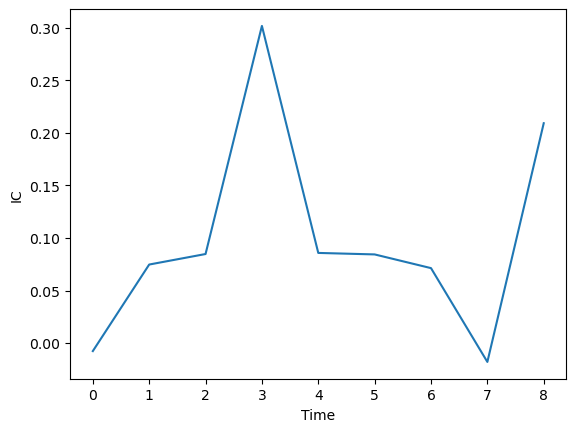

In [3]:
plt.plot(range(len(IC)), IC)
plt.xlabel("Time")
plt.ylabel("IC")

In [4]:
alpha2Return.dropna(inplace = True)

In [5]:
alpha2Return.corr()

,0,1
0,1.000000,0.112798
1,0.112798,1.000000


In [6]:
alpha2Return.to_csv("alpha2.csv")